# HOMEWORK 1: Valutazione
Si è usato trec_eval di Terrier per effettuare la valutazione, si sono quindi ottenuti i valori di:
* MAP: dal campo map all
* Precision@10: dal campo P_10 all
* Rprec: da Rprec all
Mentre risulta necessario calcolare ANOVA-oneway

In [2]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
alpha=0.05
# Trovo i dati dal file di valutazione della run
# apro la valutazione con PorterStemmer,Stopwords e modello BM25
valutazioneBM25_0  = open("C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneBM25_0.txt","r") 
linee = valutazioneBM25_0.readlines() 
map_bm250=[]
topics = range(6,4554,91)
for index in topics:
#inserisco in array map_bm250 le map dei singoli topic
        riga = linee[index]
        riga = riga.split()
        #print(riga)
        map_bm250.append(riga[2])  
#print("BM250")
#print(map_bm250)
# apro la valutazione con PorterStemmer,Stopwords e modello TFIDF
valutazioneTFIDF_1  = open("C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneTFIDF_1.txt","r") 
linee = valutazioneTFIDF_1.readlines() 
map_TFIDF1=[]
topics = range(4,4554,91)
for index in topics:
#inserisco in array map_TFIDF1 le map dei singoli topic
        riga = linee[index]
        riga = riga.split()
        map_TFIDF1.append(riga[2]) 
#print("TFIDF1")
#print(map_TFIDF1)
# apro la valutazione con PorterStemmer e modello BM25
valutazioneBM25_2  = open("C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneBM25_2.txt","r") 
linee = valutazioneBM25_2.readlines() 
map_BM252=[]
topics = range(4,4554,91)
for index in topics:
#inserisco in array map_bm252 le map dei singoli topic
        riga = linee[index]
        riga = riga.split()
        map_BM252.append(riga[2])        
#print("BM252")
#print(map_BM252)
# apro la valutazione con modello TFIDF
valutazioneTFIDF_3  = open("C:\\Users\\franc\\Desktop\\Utility\\terrier\\terrier-core-4.4\\var\\valutazioni\\valutazioneTFIDF_3.txt","r") 
linee = valutazioneTFIDF_3.readlines() 
map_TFIDF3=[]
topics = range(4,4554,91)
for index in topics:
#inserisco in array map_TFIDF3 le map dei singoli topic
        riga = linee[index]
        riga = riga.split()
        map_TFIDF3.append(riga[2]) 
#print("TFIDF3")
#print(map_TFIDF3)
#creo la matrice con tutte le map delle singole run e dei singoli topic
measures = np.c_[map_bm250, map_TFIDF1, map_BM252, map_TFIDF3]
#print(measures)
#calcolo ANOVA one way per trovare il pvalue
Fvalue, pvalue = stats.f_oneway(map_bm250, map_TFIDF1, map_BM252, map_TFIDF3)
print("F-value:",Fvalue,"P-value:",pvalue)
#controllo se il p-value è minore di alpha, in tal caso si va a sostituire
if pvalue<alpha:
    alpha=pvalue


F-value: 0.09965024788515882 P-value: 0.9601256241314807


# Identificazione delle run:
Le run sono identificate come segue:
* RUN#0: modello BM25 con indice con PorterStemmer e Stopwords;
* RUN#1: modello TFIDF con indice con PorterStemmer e Stopwords;
* RUN#2: modello BM25 con indice con PorterStemmer;
* RUN#3: modello TFIDF con indice senza PorterStemmer e Stopwords.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
RUN#0  RUN#1  -0.0006  -0.0851 0.0838 False 
RUN#0  RUN#2   0.0029  -0.0816 0.0874 False 
RUN#0  RUN#3  -0.0135   -0.098 0.071  False 
RUN#1  RUN#2   0.0035   -0.081 0.088  False 
RUN#1  RUN#3  -0.0128  -0.0973 0.0716 False 
RUN#2  RUN#3  -0.0164  -0.1008 0.0681 False 
--------------------------------------------
[[-0.08511753  0.08384553]
 [-0.08159953  0.08736353]
 [-0.09796153  0.07100153]
 [-0.08096353  0.08799953]
 [-0.09732553  0.07163753]
 [-0.10084353  0.06811953]]
[False False False False False False]
[-0.000636  0.002882 -0.01348   0.003518 -0.012844 -0.016362]
[0.02305267 0.02305267 0.02305267 0.02305267 0.02305267 0.02305267]
3.6647169573500507
[0.04224076 0.04224076 0.04224076 0.04224076]


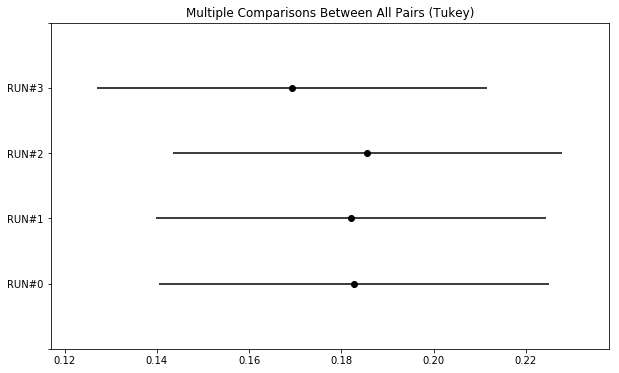

In [4]:
from statsmodels.stats.multicomp import MultiComparison
#concateno le varie AP dei vari topic 
vector_maps=np.concatenate([map_bm250, map_TFIDF1, map_BM252, map_TFIDF3])
#print(vector_maps)
#creo e popolo il vettore relativo alle RUN
runID=[]
for i in range(4):
#popolo il vettore
    for index in range(50):
        runID.append("RUN#"+str(i))
        
mc = MultiComparison(vector_maps.astype('float'), runID)
result = mc.tukeyhsd(alpha)
 
print(result)
#print(mc.groupsunique)
#metodi a disposizione di result: reject, meandiffs, confint, std_pairs, q_crit, halfwidths
print(result.confint)
print(result.reject)
print(result.meandiffs)
print(result.std_pairs)
print(result.q_crit)
result.plot_simultaneous()
print(result.halfwidths)

# Plot dei risultati
Ora inserisco i grafici con i risultati di MAP,Precision_10, Rprec e il grafico Precision-Recall?

In [ ]:
#mi prendo i dati, di ogni run e di ogni topic per il Precision-Recall
